# Tank Temperature Control: Modeling and Simulation
# 1. Introduction
In this tutorial, we will address the modeling and simulation of tank temperature control by varying the power of a heater. Through this activity, you will understand the basic concepts of system modeling and how to simulate their responses.

# 2. System Modeling
To model the system, we first start with its differential equation before moving on to its transfer function.

## 2.1. Deriving the Differential Equation
When we want to model the temperature behavior of a tank, we need to consider:

The rate at which heat is added by the heater.
The rate at which heat is lost to the environment.
Assuming a first-order system where heat loss to the environment is proportional to the temperature difference between the tank and the environment, we can write the following differential equation:

$$
  mCp\frac{d(T)}{dt} =P(t)-k(T(t)-Ta)
$$

Here:

* T(t) is the temperature of the tank as a function of time.
* P(t) is the power of the heater.
* Ta​ is the ambient temperature, assumed to be constant.
* m is the mass of the liquid in the tank.
* Cp is the specific heat of the liquid.
* k is a proportionality constant.

## 2.2. Transforming to the Transfer Function
The transfer function is a frequency-domain representation that relates the output and input of a system. To obtain the transfer function, we apply the Laplace Transform to the differential equation. Assuming zero initial conditions, we get:

$$
G(s)= \frac{1}{mCps+k​}
$$

# 3. Simulation in Python
With this information, we will simulate our transfer function with different inputs.
## 3.1. First, we import the necessary libraries



In [147]:
# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse, lsim

3.2. Defining System Parameters

In [148]:
# Parâmetros do sistema
m = 100       # Massa do líquido no tanque (kg)
C_p = 4186    # Calor específico da água (J/(kg·°C))
T_a = 25      # Temperatura ambiente (°C)
k_total = 500 # Coeficiente de perda de calor (watts/°C)

## 3.3. Establishing the Transfer Function
From the differential equation, we can derive the transfer function for the system.


In [149]:
num = [1]
den = [m*C_p, k_total]
system = lti(num, den)

## 3.4. Simulating and Visualizing the Step Response

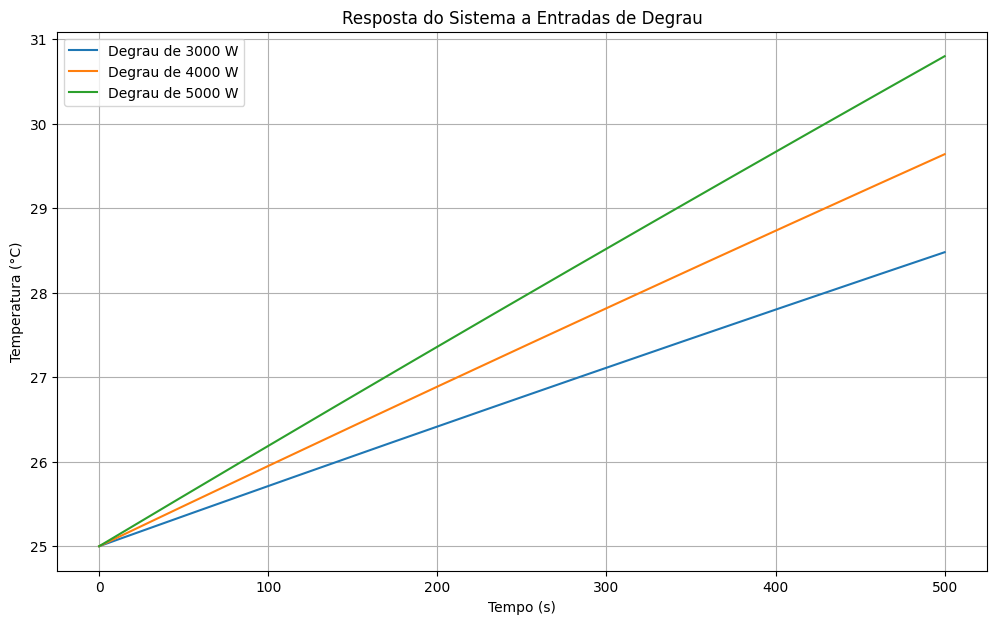

In [150]:
# Aqui é definida as amplitudes de potência
amplitudes = [3000, 4000, 5000]
responses_deg = []
for amp in amplitudes:
    t, response = step(system, T=np.linspace(0, 500, 1000))
    responses_deg.append(T_a + response * amp)

plt.figure(figsize=(12, 7))
for idx, amp in enumerate(amplitudes):
    plt.plot(t, responses_deg[idx], label=f'Degrau de {amp} W')
plt.title('Resposta do Sistema a Entradas de Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


## 3.5. Simulating and Visualizing the Impulse Response

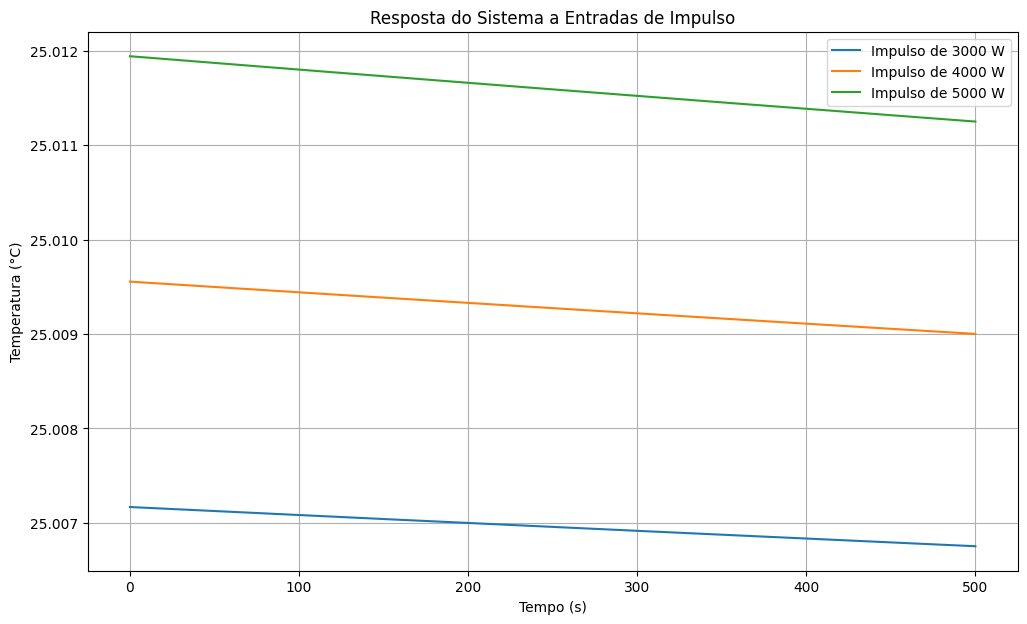

In [151]:
responses_imp = []
for amp in amplitudes:
    t, response = impulse(system, T=np.linspace(0, 500, 1000))
    responses_imp.append(T_a + response * amp)

plt.figure(figsize=(12, 7))
for idx, amp in enumerate(amplitudes):
    plt.plot(t, responses_imp[idx], label=f'Impulso de {amp} W')
plt.title('Resposta do Sistema a Entradas de Impulso')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

## 3.6. Simulating and Visualizing the Sinusoidal Response

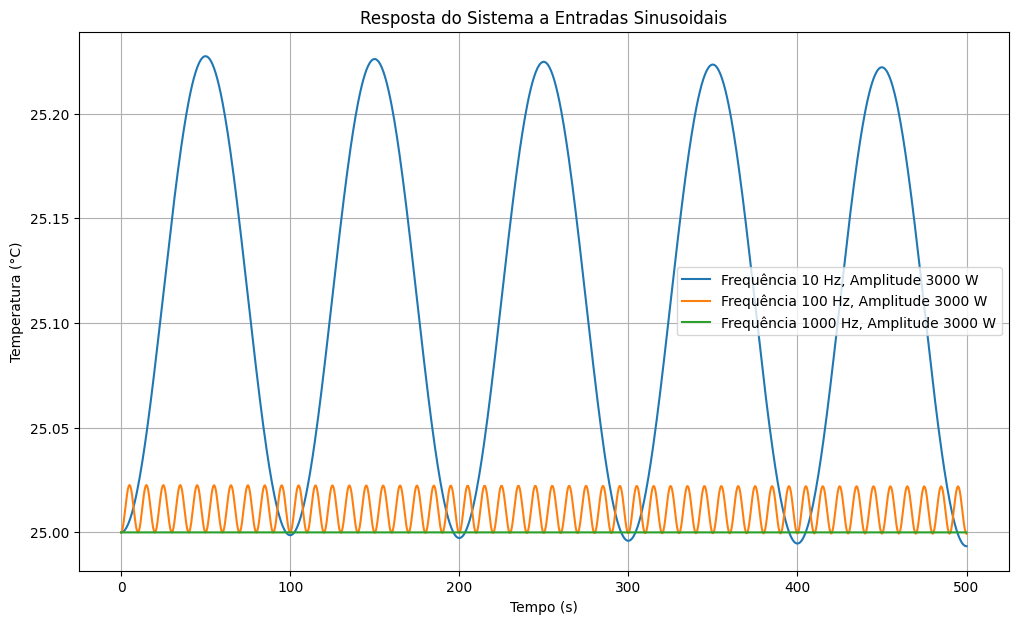

In [152]:
# Frequência em Hz
frequencies = [10, 100, 1000]
responses_sin = []
for freq in frequencies:
    t = np.linspace(0, 500, 1000)
    sinusoidal_input = 3000 * np.sin(2 * np.pi * freq * t)
    t, response, _ = lsim(system, U=sinusoidal_input, T=t)
    responses_sin.append(T_a + response)

plt.figure(figsize=(12, 7))
for idx, freq in enumerate(frequencies):
    plt.plot(t, responses_sin[idx], label=f'Frequência {freq} Hz, Amplitude 3000 W')
plt.title('Resposta do Sistema a Entradas Sinusoidais')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


## 4. Conclusion
In this lesson, we explored how different inputs affect the temperature response of a heating tank. By observing the graphs, we can analyze how the system reacts to variations in input amplitude and frequency, which is crucial for designing efficient control systems.

